### Información utilizada:
El análisis se basa en un conjunto de datos proporcionado por la Fiscalía General de Justicia de la CDMX, que contiene información detallada sobre delitos, con un enfoque en los robos a transeúntes.
A partir de este dataset, se seleccionaron y procesaron las siguientes variables clave:


### Diccionario de datos (después de la limpieza de datos)

| Número de variable | Nombre de la variable | Tipo de dato | Descripción |
|--------------------|-----------------------|--------------|-------------|
| 1                  | mes_codificado        | Categórico   | Mes codificado en el que ocurrió el delito, donde 0=enero y 11=diciembre. |
| 2                  | hora_minutos            | Continuo   | Hora en la que ocurrió el delito, convertida en minutos desde el inicio del día. |
| 3                  | 	alcaldia_codificada        | Categórico   | Alcaldía codificada donde ocurrió el hecho, donde 0=Álvaro Obregón, 1=Benito Juárez, 2=Cuauhtémoc, 3=Gustavo A. Madero, 4=Iztapalapa, 5=Miguel Hidalgo. |
| 4                  | 	dia_semana               | Categórico     | Día de la semana en el que ocurrió el delito, donde 0=lunes y 6=domingo. |
| 5                  | latitud               | Continuo     | Coordenada de latitud del lugar donde ocurrió el hecho. |
| 6                  | longitud              | Continuo     | Coordenada de longitud del lugar donde ocurrió el hecho. |

Para fines prácticos tomamos una muestra de 100 registros aleatorios de las siguientes alcaldías:

•	Iztapalapa

•	Cuauhtémoc

•	Gustavo A. Madero

•	Benito Juárez

•	Miguel Hidalgo

•	Álvaro Obregón

Esta muestra ya está limpia y no contiene valores nulos.

Nota: Las alcaldías fueron seleccionadas de esa manera porque son en las que ocurren más delitos e hicimos esa selección con el fin de delimitar los datos.


---



Carga de bibliotecas y librerías

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

Carga de datos

##Variables seleccionadas
Para el árbol de regresión utilizaremos las siguientes variables: (Después de la limpieza)

latitud: ubicación geográfica de los delitos.

longitud: ubicación geográfica de los delitos.

dia_semana: para conocer los días específicos en los que ocurren los delitos, donde 0=lunes y 6=domingo

mes_codificado: para ver cuales meses presentan un mayor número de delitos, donde 0=enero y así sucesivamente hasta 11=diciembre.

hora_minutos: con esta variable podemos conocer los delitos en función del tiempo transcurrido en minutos.

alcaldia_codificada: con esta variable podemos conocer la zona específica de la ciudad, donde 0=Alvaro Obregon, 1=Benito Juarez, 2= Cuahtemoc, 3=Gustavo A. Madero, 4=Iztapalapa, 5=Miguel Hidalgo.

## NOTA: Anteriormente se hizo una limpieza de datos para el proyecto, por lo que a continuación procedo a cargar del dataset que será usado para el modelo con las variables necesarias ya con cambios en las variables categoricas

In [ ]:
# Configuración de estilos para las gráficas
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline


In [ ]:
df = pd.read_csv('Datos_RegresionLogistica.csv')
df

,anio_inicio,mes_inicio,fecha_inicio,hora_inicio,anio_hecho,mes_hecho,fecha_hecho,hora_hecho,delito,categoria_delito,...,alcaldia_hecho,alcaldia_catalogo,municipio_hecho,latitud,longitud,dia_semana,mes_codificado,alcaldia_codificada,hora_minutos,conteoDelitos
0,2021,Abril,2021-04-25,00:00:00,2021.0,Marzo,2021-03-16,15:55:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,...,ALVARO OBREGON,Álvaro Obregón,CDMX,19.384600,-99.214330,2.0,7,0,955.0,772.0
1,2021,Agosto,2021-08-20,00:00:00,2021.0,Agosto,2021-08-18,14:10:00,ROBO A TRANSEUNTE EN PARQUES Y MERCADOS CON VI...,DELITO DE BAJO IMPACTO,...,ALVARO OBREGON,Álvaro Obregón,CDMX,19.386010,-99.226520,3.0,1,0,850.0,789.0
2,2023,Abril,2023-04-13,21:13:39,2023.0,Abril,2023-04-13,20:35:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,...,ALVARO OBREGON,Álvaro Obregón,CDMX,19.384691,-99.235316,4.0,0,0,1235.0,754.0
3,2021,Julio,2021-07-24,00:00:00,2021.0,Julio,2021-07-24,12:05:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,...,ALVARO OBREGON,Álvaro Obregón,CDMX,19.377960,-99.213380,6.0,5,0,725.0,740.0
4,2021,Noviembre,2021-11-03,00:00:00,2021.0,Octubre,2021-10-03,04:50:00,ROBO A TRANSEUNTE EN VIA PUBLICA SIN VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,...,ALVARO OBREGON,Álvaro Obregón,CDMX,19.382370,-99.229770,7.0,10,0,290.0,802.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021,Febrero,2021-02-10,00:00:00,2021.0,Febrero,2021-02-08,20:00:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,...,MIGUEL HIDALGO,Miguel Hidalgo,CDMX,19.401460,-99.186500,1.0,4,5,1200.0,812.0
96,2020,Septiembre,2020-09-30,00:00:00,2020.0,Septiembre,2020-09-30,18:18:00,ROBO A TRANSEUNTE EN VIA PUBLICA SIN VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,...,MIGUEL HIDALGO,Miguel Hidalgo,CDMX,19.440640,-99.208790,3.0,11,5,1098.0,895.0
97,2021,Abril,2021-04-30,00:00:00,2021.0,Abril,2021-04-29,20:30:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,...,IZTAPALAPA,Iztapalapa,CDMX,19.390080,-99.043270,4.0,0,4,1230.0,1930.0
98,2023,Marzo,2023-03-31,15:57:36,2023.0,Marzo,2023-03-31,15:15:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,...,IZTAPALAPA,Iztapalapa,CDMX,19.371448,-99.022366,5.0,7,4,915.0,2130.0


In [ ]:
print("\nInformación del dataset:")
display(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   anio_inicio           100 non-null    int64  
 1   mes_inicio            100 non-null    object 
 2   fecha_inicio          100 non-null    object 
 3   hora_inicio           100 non-null    object 
 4   anio_hecho            100 non-null    float64
 5   mes_hecho             100 non-null    object 
 6   fecha_hecho           100 non-null    object 
 7   hora_hecho            100 non-null    object 
 8   delito                100 non-null    object 
 9   categoria_delito      100 non-null    object 
 10  fiscalia              100 non-null    object 
 11  agencia               100 non-null    object 
 12  unidad_investigacion  100 non-null    object 
 13  colonia_hecho         100 non-null    object 
 14  colonia_catalogo      100 non-null    object 
 15

None

In [ ]:
print("\nEstadísticas descriptivas:")
display(df.describe())


Estadísticas descriptivas:


,anio_inicio,anio_hecho,latitud,longitud,dia_semana,mes_codificado,alcaldia_codificada,hora_minutos,conteoDelitos
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2021.770000,2021.760000,19.409419,-99.143383,4.030000,5.880000,2.560000,804.330000,1273.650000
std,1.013594,1.016232,0.050332,0.057330,1.940816,3.511252,1.713405,388.219324,534.941616
min,2020.000000,2020.000000,19.304004,-99.248340,1.000000,0.000000,0.000000,10.000000,740.000000
25%,2021.000000,2021.000000,19.374892,-99.186585,2.000000,3.000000,1.000000,551.250000,831.250000
50%,2022.000000,2022.000000,19.401570,-99.150255,4.000000,5.500000,3.000000,840.000000,996.000000
75%,2023.000000,2023.000000,19.446821,-99.112657,6.000000,9.000000,4.000000,1112.500000,1929.000000
max,2024.000000,2024.000000,19.540648,-98.995246,7.000000,11.000000,5.000000,1400.000000,2321.000000


## Preprocesamiento de datos

In [ ]:
# Seleccionar las 6 variables propuestas
variables = ['alcaldia_codificada', 'dia_semana', 'mes_codificado',
             'hora_minutos', 'latitud', 'longitud', 'conteoDelitos']

df_model = df[variables].copy()

# Verificar si hay valores nulos
print("Valores nulos por columna:")
print(df_model.isnull().sum())

# Calcular el promedio de incidentes por alcaldía
alcaldia_counts = df['alcaldia_codificada'].value_counts()
average_incidents = alcaldia_counts.mean()

Valores nulos por columna:
alcaldia_codificada    0
dia_semana             0
mes_codificado         0
hora_minutos           0
latitud                0
longitud               0
conteoDelitos          0
dtype: int64


In [ ]:
# Crear la columna 'alcaldia_alto_riesgo' basada en el umbral promedio
# Removed extra newlines from the column name
df['alcaldia_alto_riesgo'] = df['alcaldia_codificada'].apply(lambda x: 1 if alcaldia_counts[x] > average_incidents else 0)

# Verificar la distribución de la variable objetivo
print(df['alcaldia_alto_riesgo'].value_counts())

alcaldia_alto_riesgo
1    52
0    48
Name: count, dtype: int64


La variable alcaldia_alto_riesgo tiene una distribución bastante equilibrada en nuestro conjunto de datos, con 52 registros clasificados como "alto riesgo" (1) y 48 como "bajo riesgo" (0). Esta distribución balanceada es ideal para un modelo de clasificación, ya que minimiza el riesgo de sesgo hacia una de las clases. Si una clase fuera significativamente más frecuente que la otra, el modelo podría inclinarse hacia esa clase, afectando la precisión en casos menos comunes.

## Modelo

### Seleccionar las Variables Predictoras (X) y la Variable Objetivo (y)

In [ ]:
# Selección de variables predictoras y objetivo
X = df[['alcaldia_codificada', 'dia_semana', 'mes_codificado', 'hora_minutos', 'latitud', 'longitud']]
y = df['alcaldia_alto_riesgo']

### Dividir los Datos en Conjuntos de Entrenamiento y Prueba

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X.head()

,alcaldia_codificada,dia_semana,mes_codificado,hora_minutos,latitud,longitud
0,0,2.0,7,955.0,19.384600,-99.214330
1,0,3.0,1,850.0,19.386010,-99.226520
2,0,4.0,0,1235.0,19.384691,-99.235316
3,0,6.0,5,725.0,19.377960,-99.213380
4,0,7.0,10,290.0,19.382370,-99.229770


In [ ]:
print(y)

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: alcaldia_alto_riesgo, Length: 100, dtype: int64


In [ ]:
print(y_train)

55    1
88    1
26    0
42    0
69    1
     ..
60    1
71    1
14    0
92    1
51    1
Name: alcaldia_alto_riesgo, Length: 80, dtype: int64


### Escalado de Características

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_train)

    alcaldia_codificada  dia_semana  mes_codificado  hora_minutos    latitud  \
55                    3         2.0               8         600.0  19.462270   
88                    5         4.0              10         750.0  19.453373   
26                    1         6.0               8        1360.0  19.371060   
42                    2         4.0               4        1110.0  19.463708   
69                    4         7.0               4        1080.0  19.337980   
..                  ...         ...             ...           ...        ...   
60                    3         3.0               5         780.0  19.504817   
71                    4         5.0               9         828.0  19.362510   
14                    0         1.0               1        1318.0  19.340889   
92                    5         3.0              10         960.0  19.446730   
51                    3         5.0               3        1272.0  19.540648   

     longitud  
55 -99.090750  
88 -99.

In [ ]:
print("Características escaladas de entrenamiento:\n", X_train_scaled[:5])
print("\nCaracterísticas escaladas de prueba:\n", X_test_scaled[:5])

Características escaladas de entrenamiento:
 [[ 0.22274226 -1.04173714  0.67969942 -0.60837931  0.93761057  0.85875762]
 [ 1.41070095 -0.02540822  1.25207787 -0.21268545  0.76767898 -1.0709838 ]
 [-0.96521644  0.99092069  0.67969942  1.39646958 -0.80440535 -0.35622508]
 [-0.37123709 -0.02540822 -0.4650575   0.73697981  0.96507837 -0.11204911]
 [ 0.8167216   1.49908515 -0.4650575   0.65784104 -1.43619887  1.68877138]]

Características escaladas de prueba:
 [[ 1.41070095 -1.04173714  1.25207787 -0.15728831 -0.21444649 -0.80919938]
 [ 0.22274226  0.99092069  0.67969942 -0.15992627  1.1934592   0.10649239]
 [ 0.8167216   0.48275624 -0.17886827 -2.13839556 -1.02448689  0.0189054 ]
 [-0.37123709 -1.04173714  1.25207787  1.10629408  0.01671466 -0.01334033]
 [-0.37123709 -1.5499016   0.67969942 -1.84822006  0.2438635   0.0527649 ]]


### Entrenar modelo

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

### Predicción

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

### Matriz de Confusión

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

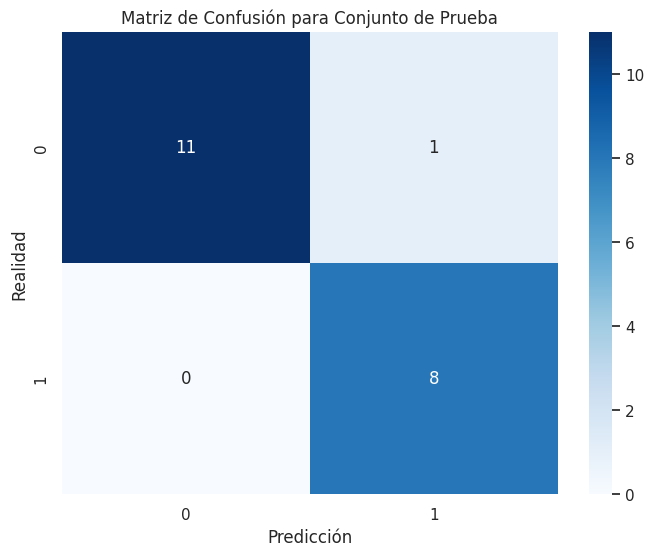

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión para Conjunto de Prueba")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()

In [ ]:
accuracy_score(y_test, y_pred)

0.95

Este es un excelente resultado, ya que los errores son mínimos. Solo hubo un caso de falso positivo, y no hubo falsos negativos. La ausencia de falsos negativos es particularmente favorable en este contexto, ya que significa que el modelo identificó correctamente todos los casos de alto riesgo, sin dejar de clasificar a ninguna alcaldía de alto riesgo.

La precisión del modelo es del 95%, lo cual es un indicador fuerte de rendimiento. Dado que la matriz de confusión muestra solo un error en el conjunto de prueba, el alto valor de accuracy refleja que el modelo tiene una alta capacidad de predicción para ambos niveles de riesgo (alto y bajo). Este valor sugiere que el modelo puede generalizar bien al clasificar las alcaldías en este dataset.

### Visualizaciones de Resultados para Conjuntos de Entrenamiento y Prueba

<ipython-input-72-51221c3dfce6>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


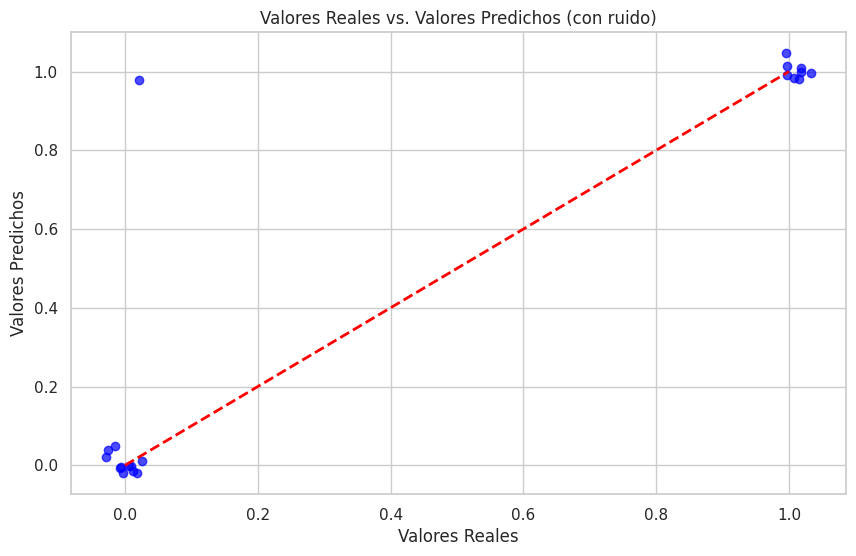

In [ ]:
# Agregar ruido leve a y_test y y_pred para mejorar la visualización
y_test_noisy = y_test + np.random.normal(0, 0.02, size=len(y_test))
y_pred_noisy = y_pred + np.random.normal(0, 0.02, size=len(y_pred))

# Gráfico con ruido
plt.figure(figsize=(10, 6))
plt.scatter(y_test_noisy, y_pred_noisy, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Reales vs. Valores Predichos (con ruido)")
plt.show()

#### La mayoría de los puntos se encuentran cerca de esta línea, lo cual indica un buen ajuste. Sin embargo, parece que hay un valor atípico en la esquina superior derecha, donde un punto se desvía considerablemente de la línea. Este valor atípico podría ser un indicativo de un error en la predicción o una observación con características particulares que el modelo no logró capturar adecuadamente. La presencia de este valor atípico sugiere que el modelo puede tener problemas para generalizar en ciertos casos extremos.

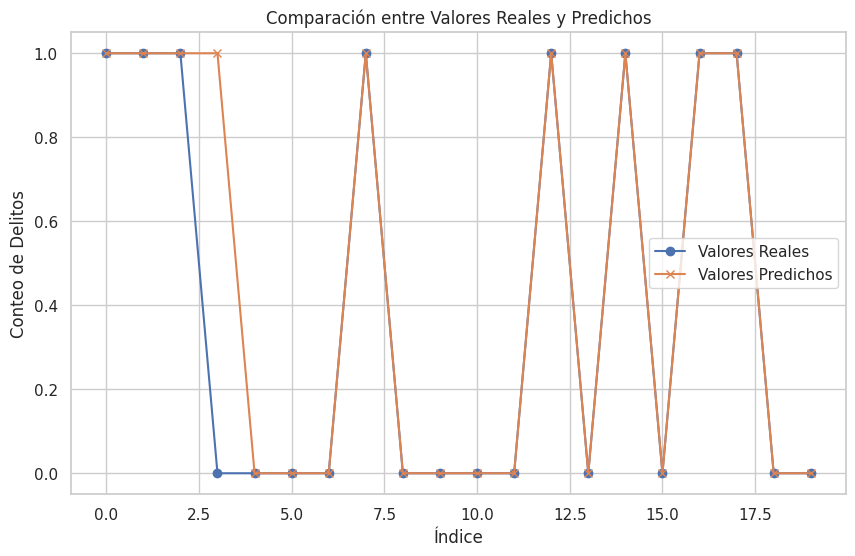

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Valores Reales", marker='o')
plt.plot(y_pred, label="Valores Predichos", marker='x')
plt.xlabel("Índice")
plt.ylabel("Conteo de Delitos")
plt.title("Comparación entre Valores Reales y Predichos")
plt.legend()
plt.show()

Observamos que el modelo sigue un patrón oscilante similar al de los valores reales, lo cual indica que está capturando bastante bien la variabilidad en los datos. Sin embargo, hay un punto donde el valore predicho no se ajusta perfectamente a los reales, lo cual podría reflejar una ligera falta de precisión en los casos extremos o fluctuantes.

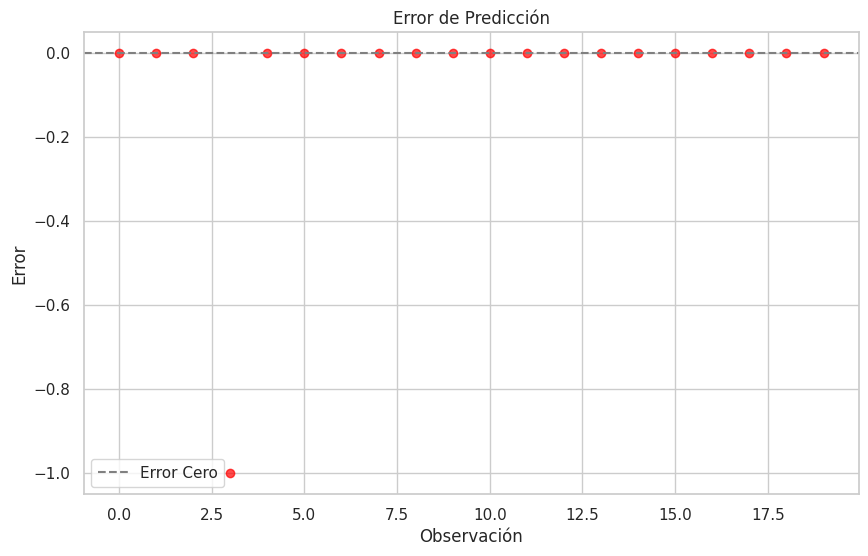

In [ ]:
error = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), error, color='red', alpha=0.7)
plt.axhline(y=0, color='gray', linestyle='--', label="Error Cero")
plt.title('Error de Predicción')
plt.xlabel('Observación')
plt.ylabel('Error')
plt.legend()
plt.show()

La baja magnitud del error en la mayoría de los puntos indica un buen desempeño general del modelo. No obstante, el valor atípico sugiere que el modelo podría beneficiarse de técnicas adicionales para manejar mejor los outliers o casos extremos en el conjunto de datos.


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Calcular el RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

MSE: 0.05
RMSE: 0.22360679774997896
R-squared: 0.7916666666666667


El RMSE, que está en la misma escala que los datos, muestra un error de predicción relativamente bajo, lo cual confirma que el modelo está logrando buenos resultados.

# Regularización
## Sin CV

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Parámetros del modelo sin validación cruzada
C_value = 0.5

In [ ]:
# Creación del modelo con el valor específico de C
model_no_cv = LogisticRegression(C=C_value, random_state=42)
model_no_cv.fit(X_train_scaled, y_train)

LogisticRegression(C=0.5, random_state=42)

### Predicción

In [ ]:
# Predicción en el conjunto de prueba
y_pred_no_cv = model_no_cv.predict(X_test_scaled)
y_pred_no_cv

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
print(y_test)

83    1
53    1
70    1
45    0
44    0
39    0
22    0
80    1
10    0
0     0
18    0
30    0
73    1
33    0
90    1
4     0
76    1
77    1
12    0
31    0
Name: alcaldia_alto_riesgo, dtype: int64


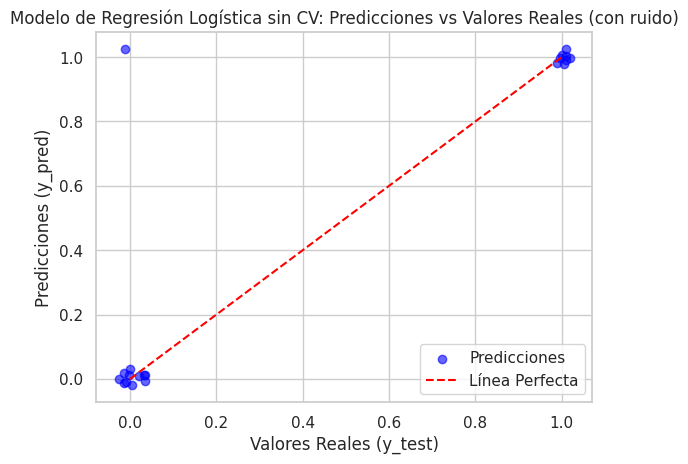

In [ ]:
import numpy as np

# Agregar ruido leve a y_test y y_pred_no_cv para mejor visualización
y_test_noisy = y_test + np.random.normal(0, 0.02, size=len(y_test))
y_pred_noisy = y_pred_no_cv + np.random.normal(0, 0.02, size=len(y_pred_no_cv))

# Gráfico con ruido
plt.scatter(y_test_noisy, y_pred_noisy, color='blue', alpha=0.6, label="Predicciones")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Línea Perfecta")
plt.title("Modelo de Regresión Logística sin CV: Predicciones vs Valores Reales (con ruido)")
plt.xlabel("Valores Reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.legend()
plt.show()

La alineación de la mayoría de los puntos sugiere que el modelo está bien ajustado para la mayoría de los datos. Sin embargo, la presencia de un valor atípico indica que el modelo podría no estar capturando correctamente ciertos casos extremos, posiblemente debido a la falta de validación cruzada para ajustar mejor los hiperparámetros y evitar estos errores en puntos específicos.

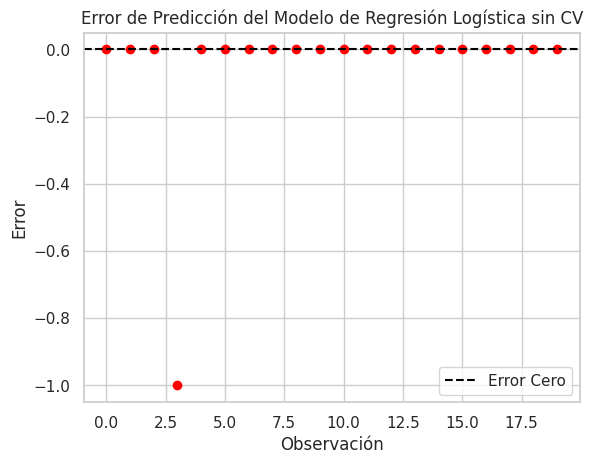

In [ ]:
# Gráfico de Error de Predicción
error_no_cv = y_test - y_pred_no_cv
plt.scatter(range(len(y_test)), error_no_cv, color='red')
plt.axhline(y=0, color='black', linestyle='--', label="Error Cero")
plt.title("Error de Predicción del Modelo de Regresión Logística sin CV")
plt.xlabel("Observación")
plt.ylabel("Error")
plt.legend()
plt.show()

La mayoría de los errores bajos sugieren un buen ajuste del modelo en general. Sin embargo, el error significativo en uno de los puntos podría reflejar una limitación del modelo para adaptarse a todos los datos sin una estrategia de regularización más robusta, como la validación cruzada. Esto indica que el modelo, aunque no está sobreajustado en términos generales, no maneja adecuadamente algunos valores extremos.

In [ ]:
mse_no_cv = np.mean(error_no_cv ** 2)
rmse_no_cv = np.sqrt(mse_no_cv)
print("MSE sin CV:", mse_no_cv)
print("RMSE sin CV:", rmse_no_cv)

MSE sin CV: 0.05
RMSE sin CV: 0.22360679774997896


El RMSE al ser bajo, indica una buena precisión en las predicciones y está en la misma escala que los datos, confirmando el buen ajuste en general.

### Regularización con Validación Cruzada (CV)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
# Definición del espacio de búsqueda de hiperparámetros
parametros = {
    'C': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100]
}

In [ ]:
# Configuración del modelo y búsqueda de mejores hiperparámetros
log_reg = LogisticRegression(random_state=42)
grid_search = GridSearchCV(estimator=log_reg, param_grid=parametros, cv=10, scoring='neg_log_loss')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100]},
             scoring='neg_log_loss')

In [ ]:
# Modelo optimizado con el mejor C encontrado
best_C = grid_search.best_params_['C']
print("Mejor valor de C encontrado:", best_C)

Mejor valor de C encontrado: 100


In [ ]:
model_cv = LogisticRegression(C=best_C, random_state=42)
model_cv.fit(X_train_scaled, y_train)

LogisticRegression(C=100, random_state=42)

In [ ]:
# Predicción en el conjunto de prueba con el modelo con CV
y_pred_cv = model_cv.predict(X_test_scaled)
y_pred_cv

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

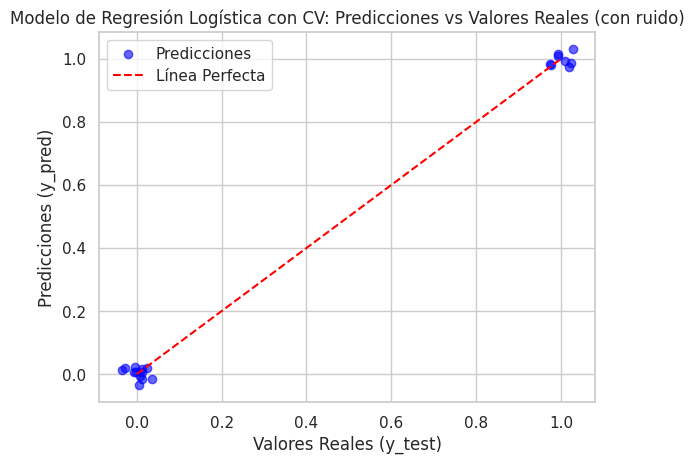

In [ ]:
# Agregar ruido leve a y_test y y_pred_cv para mejorar la visualización
y_test_noisy_cv = y_test + np.random.normal(0, 0.02, size=len(y_test))
y_pred_noisy_cv = y_pred_cv + np.random.normal(0, 0.02, size=len(y_pred_cv))

# Gráfico con ruido
plt.scatter(y_test_noisy_cv, y_pred_noisy_cv, color='blue', alpha=0.6, label="Predicciones")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Línea Perfecta")
plt.title("Modelo de Regresión Logística con CV: Predicciones vs Valores Reales (con ruido)")
plt.xlabel("Valores Reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.legend()
plt.show()

Este comportamiento indica un ajuste perfecto del modelo a los datos de prueba. La validación cruzada ha permitido seleccionar los mejores hiperparámetros, eliminando cualquier error en las predicciones y logrando una precisión del 100%. Aunque este resultado es ideal, puede sugerir un posible sobreajuste, especialmente si se está trabajando con un conjunto de datos pequeño o con poca variabilidad.

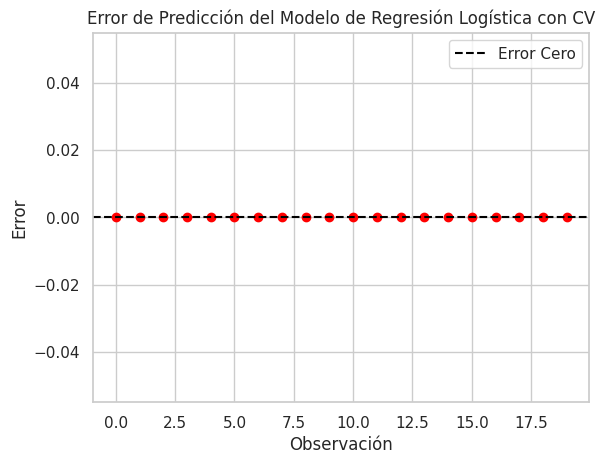

In [ ]:
error_cv = y_test - y_pred_cv
plt.scatter(range(len(y_test)), error_cv, color='red')
plt.axhline(y=0, color='black', linestyle='--', label="Error Cero")
plt.title("Error de Predicción del Modelo de Regresión Logística con CV")
plt.xlabel("Observación")
plt.ylabel("Error")
plt.legend()
plt.show()

La ausencia total de errores indica un ajuste perfecto. Esto puede reflejar que el modelo ha capturado todas las características relevantes de los datos de manera óptima, eliminando cualquier discrepancia. Sin embargo, en un escenario real, una falta absoluta de error es poco común y puede levantar una señal de posible sobreajuste, sobre todo si el conjunto de datos no es lo suficientemente amplio o diverso.

In [ ]:
mse_cv = mean_squared_error(y_test, y_pred_cv)
rmse_cv = np.sqrt(mse_cv)
print("MSE con CV:", mse_cv)
print("RMSE con CV:", rmse_cv)

MSE con CV: 0.0
RMSE con CV: 0.0


Sin CV: Entrenamos el modelo sin optimización de hiperparámetros, usando un valor fijo de C. Observamos las predicciones y errores mediante gráficos y calculamos el error cuadrático medio (MSE) y su raíz cuadrada (RMSE) para evaluar la precisión.

Con CV: Utilizamos GridSearchCV para encontrar el mejor valor de C mediante validación cruzada. Esto permite optimizar el modelo y encontrar el balance adecuado entre ajuste y regularización. Luego, generamos las mismas visualizaciones y métricas para comparar el rendimiento.

Ambas aproximaciones ofrecen perspectivas diferentes sobre el rendimiento del modelo, y la validación cruzada generalmente mejora la capacidad de generalización del modelo.